In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('Downloads/online_sales_dataset.csv')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.200000,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.230000,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.200000,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.310000,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


In [6]:
# Data cleaning function
def clean_data(df):
    # Handle missing values for CustomerID and ShippingCost
    df = df.dropna(subset=['CustomerID', 'ShippingCost'])
    
    # Correcting negative values in Quantity and UnitPrice, as these may indicate returns
    df['Quantity'] = df['Quantity'].abs()
    df['UnitPrice'] = df['UnitPrice'].abs()
    
    # Standardize PaymentMethod names for consistency
    df['PaymentMethod'] = df['PaymentMethod'].str.replace('paypall', 'PayPal', case=False)
    return df

data_cleaned = clean_data(data)

/var/folders/gw/p4rv6sfn0fx4sk29djptzr_40000gp/T/ipykernel_15696/948864219.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = df['Quantity'].abs()
/var/folders/gw/p4rv6sfn0fx4sk29djptzr_40000gp/T/ipykernel_15696/948864219.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UnitPrice'] = df['UnitPrice'].abs()
/var/folders/gw/p4rv6sfn0fx4sk29djptzr_40000gp/T/ipykernel_15696/948864219.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [8]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44804 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          44804 non-null  int64  
 1   StockCode          44804 non-null  object 
 2   Description        44804 non-null  object 
 3   Quantity           44804 non-null  int64  
 4   InvoiceDate        44804 non-null  object 
 5   UnitPrice          44804 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            44804 non-null  object 
 8   Discount           44804 non-null  float64
 9   PaymentMethod      44804 non-null  object 
 10  ShippingCost       44804 non-null  float64
 11  Category           44804 non-null  object 
 12  SalesChannel       44804 non-null  object 
 13  ReturnStatus       44804 non-null  object 
 14  ShipmentProvider   44804 non-null  object 
 15  WarehouseLocation  44804 non-null  object 
 16  OrderPriority      448

In [9]:
# Generate basic statistics and correlation matrix
def generate_statistics(df):
    desc = df.describe()
    corr_matrix = df.corr()
    print("Data Description:\n", desc)
    print("\nCorrelation Matrix:\n", corr_matrix)
    return desc, corr_matrix

# Run statistics
desc_stats, corr_matrix = generate_statistics(data_cleaned)

Data Description:
            InvoiceNo      Quantity     UnitPrice    CustomerID      Discount  \
count   44804.000000  44804.000000  44804.000000  44804.000000  44804.000000   
mean   549849.692282     24.896973     50.622735  55032.871775      0.250474   
std    260681.031778     14.150006     28.596901  25913.660157      0.144349   
min    100005.000000      1.000000      1.000000  10001.000000      0.000000   
25%    323744.750000     13.000000     25.880000  32750.750000      0.130000   
50%    551099.500000     25.000000     50.490000  55165.000000      0.250000   
75%    775251.750000     37.000000     75.400000  77306.250000      0.380000   
max    999997.000000     49.000000    100.000000  99998.000000      0.500000   

       ShippingCost  
count  44804.000000  
mean      17.484206  
std        7.218483  
min        5.000000  
25%       11.210000  
50%       17.470000  
75%       23.710000  
max       30.000000  

Correlation Matrix:
               InvoiceNo  Quantity  UnitP

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

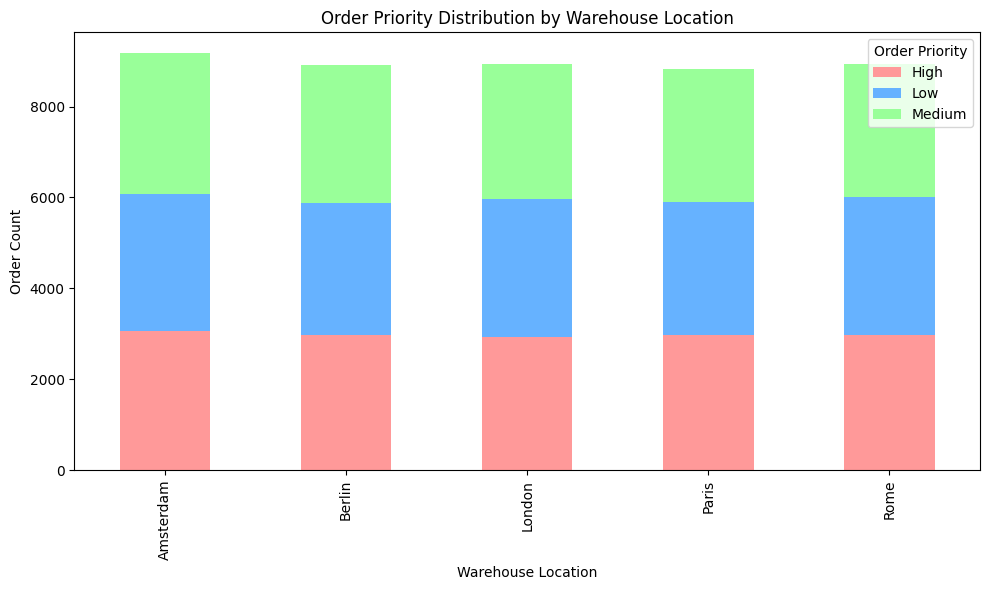

In [20]:
# 1. Stacked Bar Chart: Warehouse Location by Order Priority
def plot_warehouse_location_order_priority(df):
    # Create a cross-tabulation of WarehouseLocation and OrderPriority
    location_priority_counts = pd.crosstab(df['WarehouseLocation'], df['OrderPriority'])
    
    # Plot the stacked bar chart
    location_priority_counts.plot(kind='bar', stacked=True, figsize=(10, 6), 
                                  color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
    
    plt.title('Order Priority Distribution by Warehouse Location')
    plt.xlabel('Warehouse Location')
    plt.ylabel('Order Count')
    plt.legend(title='Order Priority')
    plt.tight_layout()
    plt.show()

plot_warehouse_location_order_priority(data_cleaned)

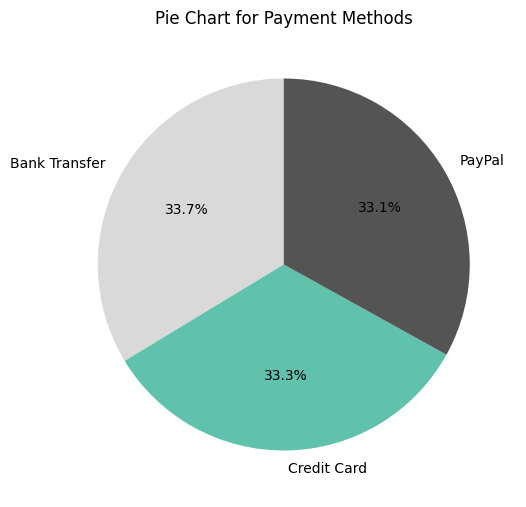

In [17]:
# 2. Pie Chart: Payment Methods Distribution
def plot_payment_method_distribution(df):
    # Count the occurrences of each payment method
    payment_method_counts = df['PaymentMethod'].value_counts()
    
    # Plot the pie chart
    plt.figure(figsize=(6, 8))
    plt.pie(payment_method_counts,
            labels=payment_method_counts.index,
            autopct='%1.1f%%', 
            startangle=90, 
            colors=["#d9d9d9", "#60C1AD", "#545454"]
           )
    plt.title("Pie Chart for Payment Methods")
    plt.show()

plot_payment_method_distribution(data_cleaned)

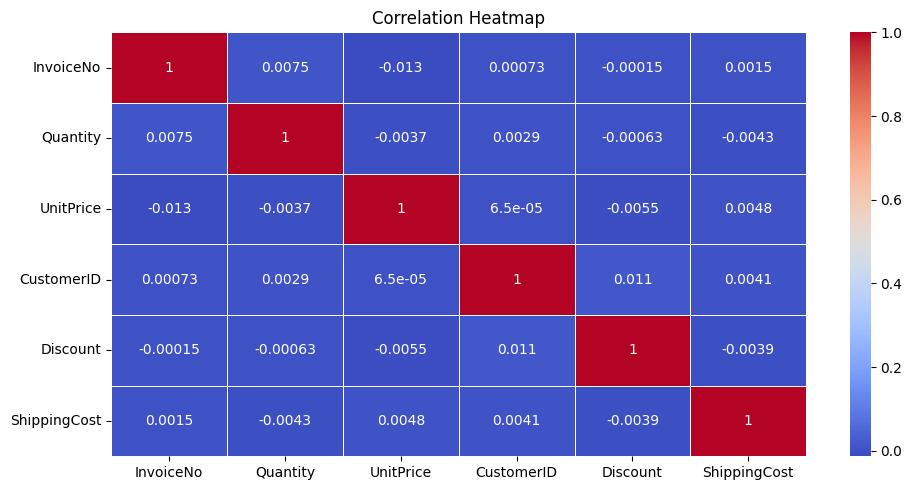

In [24]:
# 3. Correlation Heatmap
def plot_correlation_heatmap(df):
    plt.figure(figsize=(10,5))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
plot_correlation_heatmap(data_cleaned)